# Step 3 - Climate Analysis and Exploration¶

### Step 3 - Climate Analysis and Exploration. You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib. Create a Jupyter Notebook file called climate_analysis.ipynb and use it to complete your climate analysis and data exporation. Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total. Use SQLAlchemy create_engine to connect to your sqlite database. Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

## Precipitation Analysis

#### Design a query to retrieve the last 12 months of precipitation data. Select only the date and prcp values. Load the query results into a Pandas DataFrame and set the index to the date column. Plot the results using the DataFrame plot method.

In [44]:
# All dependency
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import requests as req
import seaborn as sns
from datetime import datetime, date, timedelta
from  matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches

from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Date
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import extract
from sqlalchemy import func, desc
import pymysql
pymysql.install_as_MySQLdb()

In [45]:
#Use SQLAlchemy create_engine to connect to your already created/saved data,  sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite")

In [46]:
# Declare a Base using `automap_base()`\n",
Base = automap_base()

In [47]:
# Use the Base class to reflect the database tables\n",
Base.prepare(engine, reflect=True)

In [48]:
# Print all of the classes mapped to the Base\n",
Base.classes.keys()

['measurements', 'stations']

In [49]:
# Assign the Measurement class to a variable called measurement
measurement = Base.classes.measurements

In [50]:
Base.classes.measurements

sqlalchemy.ext.automap.measurements

In [51]:
# Assign the Measurement class to a variable called station
station = Base.classes.stations

In [52]:
# Assign the station class to a variable called station# Assign  
Base.classes.stations

sqlalchemy.ext.automap.stations

In [53]:
# Create a session# Create  
from sqlalchemy.orm import Session
session = Session(bind=engine)

# Precipitation Analysis Design a query to retrieve the last 12 months of precipitation data.

In [54]:
# Assigned the Measurement class to a variable called measurement in previous sections.

# Here saving my query to a list
mylist = session.query(measurement.date, measurement.prcp).filter(measurement.date.between('2016-08-23', '2017-08-23')).all()

In [55]:
engine = engine.connect()
engine

In [59]:
# Converting my list to a dataframe and renaming columns.
prcp_analysis_df = pd.DataFrame.from_records(mylist)
prcp_analysis_df = prcp_analysis_df.rename(columns={0: "Date", 1: "precipitation"})
prcp_analysis_df.head()

,Date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [60]:
#  set the index to the date column.#  set th 
prcp_analysis_df.set_index(['Date'], inplace=True)
prcp_analysis_df.head()

,precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [61]:
type(prcp_analysis_df.precipitation[0])

numpy.float64

In [62]:
plt.style.use('ggplot')
fig = plt.figure()

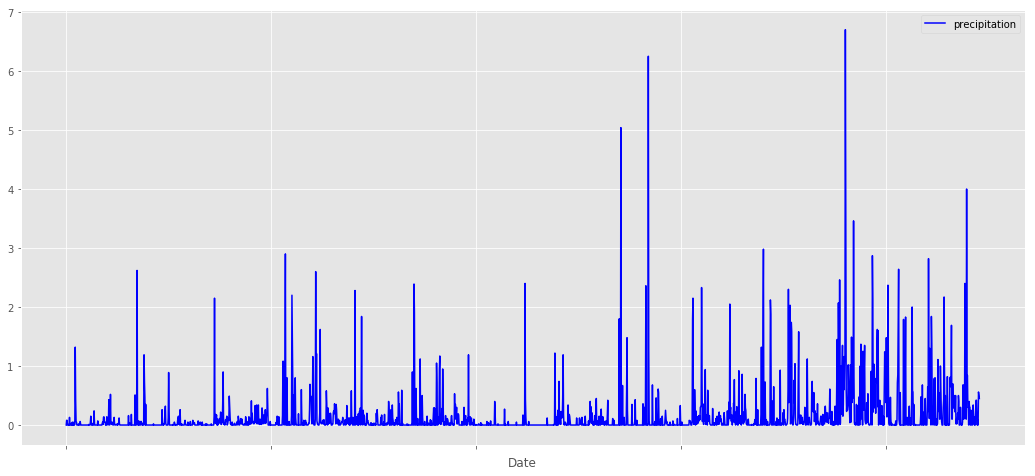

In [63]:
#Plot the DataFrame plot method.#Plot the 

prcp_analysis_df.plot(figsize = (18,8), color='blue', rot = 340 )
plt.show()

## Station Analysis

#### Design a query to calculate the total number of stations. Design a query to find the most active stations. List the stations and observation counts in descending order. Which station has the highest number of observations? Design a query to retrieve the last 12 months of temperature observation data (tobs). Filter by the station with the highest number of observations. Plot the results as a histogram with bins=12.

In [64]:
tot_stations = session.query(station.station).filter(station.station == 'USC00519397').count()
tot_stations

1

In [65]:
# Design a query to calculate the total number of stations

tol_num_stations = session.query(measurement).group_by(measurement.station).count()
tol_num_stations

9

In [66]:
# Design a query to find the most active stations.
from sqlalchemy import create_engine, func, inspect
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [67]:
# Design a query to find the most active stations.

Active_stations  = session.query(measurement.station, station.name, measurement.date, func.count(measurement.tobs)).\
                          join(station, station.station == measurement.station).\
                          group_by(measurement.station).\
                          order_by(func.count(measurement.tobs).desc()).all()

In [68]:
#List the stations and observation counts in descending order Which station has the highest number of observations?
Active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', '2017-08-18', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2017-08-23', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', '2017-07-31', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', '2017-08-23', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', '2017-08-23', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', '2017-08-23', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', '2015-10-30', 1979),
 ('USC00517948', 'PEARL CITY, HI US', '2017-07-31', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', '2015-11-20', 511)]

In [69]:
type(Active_stations)

list

In [70]:
#Filter by the station with the highest number of observations.
Active_stations[0][0:2]

('USC00519281', 'WAIHEE 837.5, HI US')

In [71]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
station_tobs = session.query(measurement.station, station.station.name, measurement.date, measurement.tobs).\
               filter(measurement.station == (Active_stations[0][0])).\
               filter(measurement.date.between('2016-08-23', '2017-08-23')).all()
            
        
len(station_tobs)

352

In [72]:
type(station_tobs)

list

In [73]:
# Converting my station_temp_tobs to a dataframe.
tobs_df = pd.DataFrame.from_records(station_tobs)
tobs_df.head()

,0,1,2,3
0,USC00519281,USC00519281,2016-08-23,77
1,USC00519281,USC00519281,2016-08-24,77
2,USC00519281,USC00519281,2016-08-25,80
3,USC00519281,USC00519281,2016-08-26,80
4,USC00519281,USC00519281,2016-08-27,75


In [74]:
# Renaming the columns to station, name, tobs# Renamin 
station_analysis_df = tobs_df.rename(columns={0: "station", 1: "name", 2: "date", 3: "tobs"})
station_analysis_df.head()

,station,name,date,tobs
0,USC00519281,USC00519281,2016-08-23,77
1,USC00519281,USC00519281,2016-08-24,77
2,USC00519281,USC00519281,2016-08-25,80
3,USC00519281,USC00519281,2016-08-26,80
4,USC00519281,USC00519281,2016-08-27,75


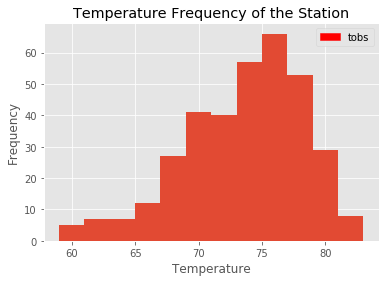

In [75]:
#Plot the results as a histogram with bins=12.
plt.style.use('ggplot')
fig = plt.figure() 
plt.figsize = (18,8)

x = station_analysis_df['tobs'] 

# the histogram of the data
plt.hist(x, bins=12)


#create legend
red_patch = mpatches.Patch(color='red', label='tobs')
plt.legend(handles=[red_patch])

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Frequency of the Station')
plt.grid(True)
plt.show()

 
plt.show()

## Temperature Analysis

#### Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates. Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01") Plot the min, avg, and max temperature from your previous query as a bar chart. Use the average temperature as the bar height. Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [76]:
# running a sqlalchemy query to get the date and tobs from  the measurement table.
tobs_date = session.query(measurement.date, measurement.tobs).all()
print(tobs_date)

[('2010-01-01', 65), ('2010-01-02', 63), ('2010-01-03', 74), ('2010-01-04', 76), ('2010-01-06', 73), ('2010-01-07', 70), ('2010-01-08', 64), ('2010-01-09', 68), ('2010-01-10', 73), ('2010-01-11', 64), ('2010-01-12', 61), ('2010-01-14', 66), ('2010-01-15', 65), ('2010-01-16', 68), ('2010-01-17', 64), ('2010-01-18', 72), ('2010-01-19', 66), ('2010-01-20', 66), ('2010-01-21', 69), ('2010-01-22', 67), ('2010-01-23', 67), ('2010-01-24', 71), ('2010-01-25', 67), ('2010-01-26', 76), ('2010-01-27', 68), ('2010-01-28', 72), ('2010-01-30', 70), ('2010-01-31', 67), ('2010-02-01', 66), ('2010-02-03', 67), ('2010-02-04', 69), ('2010-02-05', 67), ('2010-02-06', 67), ('2010-02-07', 64), ('2010-02-08', 69), ('2010-02-09', 73), ('2010-02-11', 73), ('2010-02-12', 69), ('2010-02-13', 69), ('2010-02-14', 69), ('2010-02-15', 71), ('2010-02-16', 61), ('2010-02-17', 69), ('2010-02-19', 63), ('2010-02-20', 64), ('2010-02-21', 65), ('2010-02-22', 67), ('2010-02-23', 68), ('2010-02-24', 65), ('2010-02-25', 76),

In [77]:
# Converting the tobs_date list to a dataframe and renaming the columns.
tobs_date_df = pd.DataFrame.from_records(tobs_date)
tobs_date_df = tobs_date_df.rename(columns={0: "date", 1: "tobs" })
tobs_date_df.head()

,date,tobs
0,2010-01-01,65
1,2010-01-02,63
2,2010-01-03,74
3,2010-01-04,76
4,2010-01-06,73


In [78]:
def calc_temps(date1, date2):
    mask = (tobs_date_df['date'] >= date1) & (tobs_date_df['date'] <= date2)
    
    fig, ax = plt.subplots(figsize = (5,8))
    ax.bar(x= [1], width = 1, height = tobs_date_df[mask]['tobs'].mean(), yerr = (tobs_date_df[mask]['tobs'].max()-tobs_date_df[mask]['tobs'].min()))       
    
    ax.set_xticks([0,1,2])
    ax.tick_params(axis='x',which='both', labelbottom='off')
    
    ax.set_yticks([0,20,40,60,80,100])
    plt.title('Trip Average Temp', fontsize = 14)
    ax.set_ylabel('Temp (F)', fontsize = 12)
    plt.show()
    
    
    print('The trip average temperature is: %s degrees' % tobs_date_df[mask]['tobs'].mean())
    print('The trip max temperature is: %s degrees' % tobs_date_df[mask]['tobs'].max())
    print('The trip minimum temperature is: %s degrees' % tobs_date_df[mask]['tobs'].min())

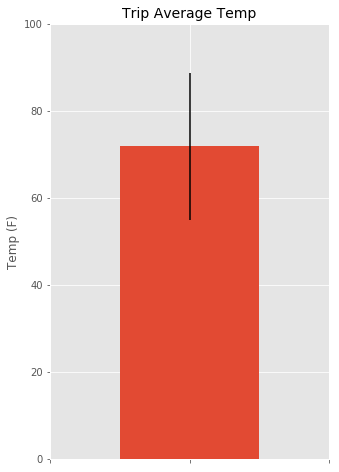

The trip average temperature is: 71.82089552238806 degrees
The trip max temperature is: 82 degrees
The trip minimum temperature is: 65 degrees


In [79]:
calc_temps ("2017-03-10", "2017-03-20")